<a href="https://colab.research.google.com/github/Yogananth-r/Linear-Regression-Health-Costs-Calculator/blob/main/fcc_predict_health_costs_with_regression_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this challenge, you will predict healthcare costs using a regression algorithm.

You are given a dataset that contains information about different people including their healthcare costs. Use the data to predict healthcare costs based on new data.

The first two cells of this notebook import libraries and the data.

Make sure to convert categorical data to numbers. Use 80% of the data as the `train_dataset` and 20% of the data as the `test_dataset`.

`pop` off the "expenses" column from these datasets to create new datasets called `train_labels` and `test_labels`. Use these labels when training your model.

Create a model and train it with the `train_dataset`. Run the final cell in this notebook to check your model. The final cell will use the unseen `test_dataset` to check how well the model generalizes.

To pass the challenge, `model.evaluate` must return a Mean Absolute Error of under 3500. This means it predicts health care costs correctly within $3500.

The final cell will also predict expenses using the `test_dataset` and graph the results.

In [37]:
!sudo apt-get update -y
!sudo apt-get install python3.9

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Ign:2 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:5 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:6 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:7 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Hit:9 http://security.ubuntu.com/ubuntu bionic-security InRelease
Hit:10 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:11 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:12 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:13 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Reading package lists... Done
Reading package lists... Done
Building dependency 

In [38]:
!sudo update-alternatives --install /usr/bin/python3 python3 /usr/bin/python3.7 1
!sudo update-alternatives --install /usr/bin/python3 python3 /usr/bin/python3.9 2

In [39]:
!python --version

Python 3.9.14


In [40]:
import sys
sys.version

'3.7.13 (default, Apr 24 2022, 01:04:09) \n[GCC 7.5.0]'

In [41]:
# Import libraries. You may or may not use all of these.
!p-q git+https://github.com/tensorflow/docsip install 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

"""import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling"""

/bin/bash: p-q: command not found
Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


'import tensorflow_docs as tfdocs\nimport tensorflow_docs.plots\nimport tensorflow_docs.modeling'

In [42]:
# Import data
!wget https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
dataset = pd.read_csv('insurance.csv')
dataset.tail()
print(len(dataset))

--2022-09-14 12:15:42--  https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 104.26.3.33, 172.67.70.149, 104.26.2.33, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|104.26.3.33|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 50264 (49K) [text/csv]
Saving to: ‘insurance.csv.2’

insurance.csv.2     100%[===================>]  49.09K  --.-KB/s    in 0s      

2022-09-14 12:15:42 (159 MB/s) - ‘insurance.csv.2’ saved [50264/50264]

1338


In [43]:
dataset.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [44]:
#covert text values to numeric values
dt=dataset
dt["sex"]=pd.factorize(dt["sex"])[0]
dt["region"]=pd.factorize(dt["region"])[0]
dt["smoker"]=pd.factorize(dt["smoker"])[0]
dataset=dt
dataset.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,0,0,16884.92
1,18,1,33.8,1,1,1,1725.55
2,28,1,33.0,3,1,1,4449.46
3,33,1,22.7,0,1,2,21984.47
4,32,1,28.9,0,1,2,3866.86


In [45]:
test_dataset=dataset.sample(frac=0.2)
print(len(test_dataset))

268


In [46]:
train_dataset=dataset[~dataset.isin(test_dataset)].dropna()
print(len(train_dataset))

1070


In [47]:
train_dataset.head()

,age,sex,bmi,children,smoker,region,expenses
0,19.0,0.0,27.9,0.0,0.0,0.0,16884.92
2,28.0,1.0,33.0,3.0,1.0,1.0,4449.46
3,33.0,1.0,22.7,0.0,1.0,2.0,21984.47
4,32.0,1.0,28.9,0.0,1.0,2.0,3866.86
5,31.0,0.0,25.7,0.0,1.0,1.0,3756.62


In [48]:
train_label=train_dataset.pop("expenses")
train_label.head()

0    16884.92
2     4449.46
3    21984.47
4     3866.86
5     3756.62
Name: expenses, dtype: float64

In [49]:
test_label=test_dataset.pop("expenses")
test_label.head()

1095     4561.19
973      1759.34
475     28868.66
147      9877.61
1330    12629.17
Name: expenses, dtype: float64

In [50]:
normalizer=layers.experimental.preprocessing.Normalization()
normalizer.adapt(np.array(train_dataset))

model= keras.Sequential([
    normalizer,
    layers.Dense(16),
    layers.Dense(4),
    layers.Dropout(.2),
    layers.Dense(1),
])

In [51]:
model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss="mae",
    metrics=['mae','mse']
)
model.build()
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_2 (Normalizat  (None, 6)                13        
 ion)                                                            
                                                                 
 dense_6 (Dense)             (None, 16)                112       
                                                                 
 dense_7 (Dense)             (None, 4)                 68        
                                                                 
 dropout_2 (Dropout)         (None, 4)                 0         
                                                                 
 dense_8 (Dense)             (None, 1)                 5         
                                                                 
Total params: 198
Trainable params: 185
Non-trainable params: 13
_______________________________________________________

In [52]:
history= model.fit(
    train_dataset,
    train_label,
    epochs=50,
    validation_split=0.5,
    verbose=0,
)

print(history)

9/9 - 0s - loss: 3362.5964 - mae: 3362.5964 - mse: 33594340.0000 - 27ms/epoch - 3ms/step
Testing set Mean Abs Error: 3362.60 expenses
You passed the challenge. Great job!


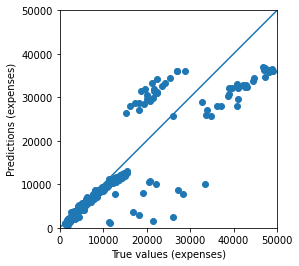

In [53]:
# RUN THIS CELL TO TEST YOUR MODEL. DO NOT MODIFY CONTENTS.
# Test model by checking how well the model generalizes using the test set.
loss, mae, mse = model.evaluate(test_dataset, test_label, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} expenses".format(mae))

if mae < 3500:
  print("You passed the challenge. Great job!")
else:
  print("The Mean Abs Error must be less than 3500. Keep trying.")

# Plot predictions.
test_predictions = model.predict(test_dataset).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_label, test_predictions)
plt.xlabel('True values (expenses)')
plt.ylabel('Predictions (expenses)')
lims = [0, 50000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims,lims)
